In [185]:
import numpy as np
import matplotlib.pyplot as plt
x1=np.random.uniform(-100,100,size=30)#Generate some random points and see if we can successfully fit them
x2=np.random.uniform(-100,100,size=30)
x3=np.random.uniform(-100,100,size=30)
x4=np.random.uniform(-100,100,size=30)
x1=np.sort(x1)
x2=np.sort(x2)
x3=np.sort(x3)
x4=np.sort(x4)
#30 points to get a function
print(x1.shape)
atruth=[2,60,0.5,55]
# y=2x1**2+60sinx2+0.5x3^3+55cosx4
def yfun(alist,x1,x2,x3,x4):
    return alist[0]*x1**2+alist[1]*np.sin(x2)+alist[2]*x3**3+alist[3]*np.cos(x4)
y=yfun(atruth,x1,x2,x3,x4)
def funmse(A,x1s=x1,x2s=x2,x3s=x3,x4s=x4,yy=y):#fit the function: minimize the mse loss
    #yy is the dependent variable and xx represents the independent variables
    #A is the weight of the independent variable to be fitted
    lena=A.shape[0]
    mse=np.zeros(A.shape[0])
    for i in range(lena):
        alis=A[i]
        ze=yfun(alis,x1s,x2s,x3s,x4s)
        mse[i]=(np.linalg.norm(ze-yy))**2/lena#2范数 (y-y*)^2
    return mse

(30,)


总耗时：0.6858007907867432s
最优变量:[ 1.99999996 60.00027129  0.5        55.00013048]
最优值是:0.000000


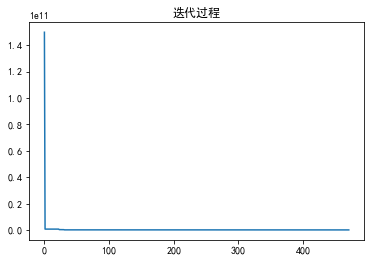

In [186]:
from psoclasses.unconsoptipso import adapwstdpso
import time
upper=[100,100,100,100]
lower=[-100,-100,-100,-100]
dim=4
psize=100
iter_num=500
adapso=adapwstdpso(funmse,lower,upper,dim,psize,max_v=2,ifplot=True,sovmax=False)
starttime=time.time()
adapso.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
adapso.printresult()
afit=adapso.getresult()[0]
#The MSE can be reduced to 0 and the function parameters are basically the same. If not, run it more times.

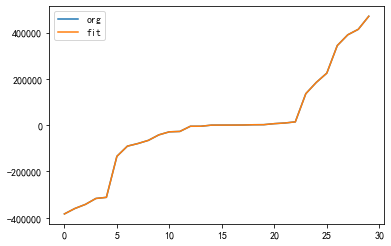

In [187]:
#fit effect,perfect!
y=yfun(atruth,x1,x2,x3,x4)
yfit=yfun(afit,x1,x2,x3,x4)
plt.plot(y,label='org')
plt.plot(yfit,label='fit')
plt.legend()
plt.show()

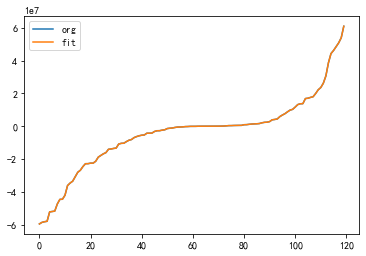

In [188]:
#Let's look at generalization
x1test=np.random.uniform(-500,500,size=120)#Generate some random points
x2test=np.random.uniform(-500,500,size=120)
x3test=np.random.uniform(-500,500,size=120)
x4test=np.random.uniform(-500,500,size=120)
x1test=np.sort(x1test)
x2test=np.sort(x2test)
x3test=np.sort(x3test)
x4test=np.sort(x4test)
ytest=yfun(atruth,x1test,x2test,x3test,x4test)
yfittest=yfun(afit,x1test,x2test,x3test,x4test)
plt.plot(ytest,label='org')
plt.plot(yfittest,label='fit')
plt.legend()
plt.show()

In [189]:
x1=np.random.uniform(-10,10,size=15)#Generate some random points and see if we can successfully fit them
x2=np.random.uniform(-10,10,size=15)
#Fit an exponential function
x1=np.sort(x1)
x2=np.sort(x2)
#30 points to get a function
print(x1.shape)
atruth=[2.23,1.385,1.459]
# y=2exp^3x+5x^4
def yfun(alist,x1,x2):
    return alist[0]*np.exp(alist[1]*x1)+alist[2]*x2**6
y=yfun(atruth,x1,x2)
def funmse(A,x1s=x1,x2s=x2,yy=y):#fit the function: minimize the mse loss
    #yy is the dependent variable and xx represents the independent variables
    #A is the weight of the independent variable to be fitted
    lena=A.shape[0]
    mse=np.zeros(A.shape[0])
    for i in range(lena):
        alis=A[i]
        ze=yfun(alis,x1s,x2s)
        mse[i]=(np.linalg.norm(ze-yy))**2/lena#2范数 (y-y*)^2
    return mse

(15,)


C:\Users\DELL\AppData\Local\Temp/ipykernel_14652/501560813.py:11: RuntimeWarning: overflow encountered in exp
  return alist[0]*np.exp(alist[1]*x1)+alist[2]*x2**6
C:\Users\DELL\AppData\Local\Temp/ipykernel_14652/501560813.py:11: RuntimeWarning: overflow encountered in multiply
  return alist[0]*np.exp(alist[1]*x1)+alist[2]*x2**6


总耗时：0.48819518089294434s
最优变量:[2.22999997 1.385      1.459     ]
最优值是:0.000000


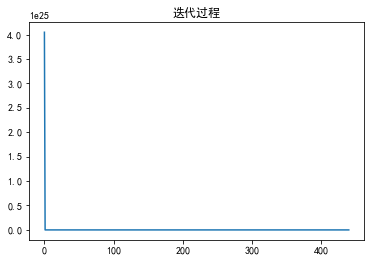

In [190]:
import time
upper=[100,100,100]
lower=[-100,-100,-100]
from psoclasses.unconsoptipso import adapwstdpso
dim=3
psize=100
iter_num=500
adapso1=adapwstdpso(funmse,lower,upper,dim,psize,max_v=2,ifplot=True,sovmax=False)
starttime=time.time()
adapso1.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
adapso1.printresult()
afit=adapso1.getresult()[0]
#The MSE can be reduced to 0 and the function parameters are basically the same. If not, run it more times.

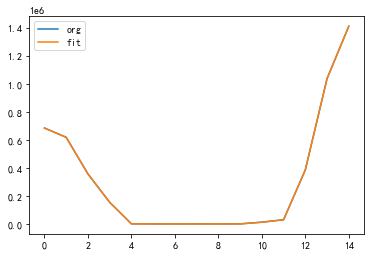

In [191]:
#fit effect,perfect!
y=yfun(atruth,x1,x2)
yfit=yfun(afit,x1,x2)
plt.plot(y,label='org')
plt.plot(yfit,label='fit')
plt.legend()
plt.show()

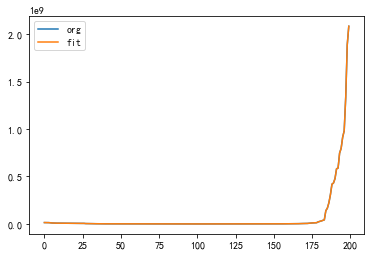

In [192]:
#Let's look at generalization
x1test=np.random.uniform(-15,15,size=200)#Generate some random points
x2test=np.random.uniform(-15,15,size=200)
x1test=np.sort(x1test)
x2test=np.sort(x2test)
ytest=yfun(atruth,x1test,x2test)
yfittest=yfun(afit,x1test,x2test)
plt.plot(ytest,label='org')
plt.plot(yfittest,label='fit')
plt.legend()
plt.show()